In [13]:
import sys
from pathlib import Path

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from skimage import exposure

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Import path
module_path = str(Path.cwd().parents[0])
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
from config import *

In [5]:
module_path = str(Path.cwd().parents[0] / "src")

if module_path not in sys.path:
    sys.path.append(module_path)
    
import my_io as io

# Import metadata information

In [6]:
df_metadata = pd.read_csv(data_dir / 'metadata.csv')
df_metadata.head()

,Pos,Grades,Stage,Directory
0,B1,2,I,Y:\coskun-lab\Thomas\Lung IMC\data\ROI\ROI001_B1
1,B3,2,I,Y:\coskun-lab\Thomas\Lung IMC\data\ROI\ROI005_B3
2,B5,2,II,Y:\coskun-lab\Thomas\Lung IMC\data\ROI\ROI006_B5
3,C6,AT,AT,Y:\coskun-lab\Thomas\Lung IMC\data\ROI\ROI007_C6
4,D7,3,IIIA,Y:\coskun-lab\Thomas\Lung IMC\data\ROI\ROI008_D7


In [7]:
datasets = df_metadata.Directory.to_list()
datasets = [name.split('\\')[-1] for name in datasets]

In [8]:
print(datasets)

['ROI001_B1', 'ROI005_B3', 'ROI006_B5', 'ROI007_C6', 'ROI008_D7', 'ROI009_D9', 'ROI012_E1', 'ROI015_B6', 'ROI016_F3', 'ROI017_F2', 'ROI018_G1', 'ROI019_G5', 'ROI020_E5', 'ROI021_E7']


In [9]:
# Define which dataset to work on 
dataset = datasets[0]

# Read marker images

In [10]:
imgs, markers = io.read_img(dataset, data_ROI)
marker2img = dict(zip(markers, imgs))
print(f'Image stack shape of {imgs.shape}')

Image stack shape of (22, 800, 800)


In [15]:
p2, p98 = np.percentile(imgs, (20.0, 99.0))
for i, img in enumerate(imgs):
    img = exposure.rescale_intensity(img, in_range=(p2, p98))
    imgs[i,:,:] = img

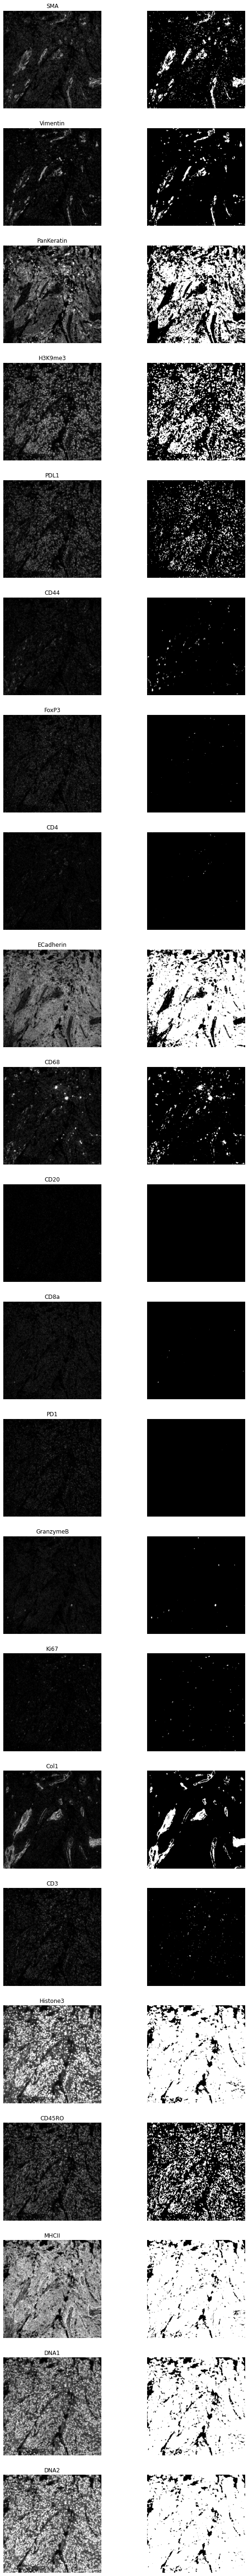

In [16]:
show = True
masks = []

if show:
    fig, axs = plt.subplots(len(markers),2,figsize=(10,100))
for idx, img in enumerate(imgs):
    blur = cv2.GaussianBlur(img, (5,5),0)
    ret,th = cv2.threshold(blur,50,255,cv2.THRESH_BINARY)
    masks.append(th)
    if show:
        axs[idx,0].set_title(markers[idx])
        axs[idx,0].imshow(img,cmap='gray')
        axs[idx,1].imshow(th, cmap='gray')
        axs[idx,0].axis('off')
        axs[idx,1].axis('off')

In [18]:
df_list = []
for dataset in datasets:
    print(dataset)
    imgs, markers = io.read_img(dataset, data_ROI)
    masks = []
    p2, p98 = np.percentile(imgs, (20.0, 99.0))
    for i, img in enumerate(imgs):
        img = exposure.rescale_intensity(img, in_range=(p2, p98))
        imgs[i,:,:] = img
    for idx, img in enumerate(imgs):
        blur = cv2.GaussianBlur(img, (5,5),0)
        ret,th = cv2.threshold(blur,50,255,cv2.THRESH_BINARY)
        masks.append(th)
    mask_area = np.array([np.count_nonzero(mask) for mask in masks])
    df_list.append(pd.DataFrame([mask_area], columns=markers))
df = pd.concat(df_list)
df.set_index([df_metadata.Pos.to_list()], inplace=True)

ROI001_B1
ROI005_B3
ROI006_B5
ROI007_C6
ROI008_D7
ROI009_D9
ROI012_E1
ROI015_B6
ROI016_F3
ROI017_F2
ROI018_G1
ROI019_G5
ROI020_E5
ROI021_E7


In [19]:
df

,SMA,Vimentin,PanKeratin,H3K9me3,PDL1,CD44,FoxP3,CD4,ECadherin,CD68,...,PD1,GranzymeB,Ki67,Col1,CD3,Histone3,CD45RO,MHCII,DNA1,DNA2
B1,51016,28819,341894,223270,56967,3991,333,245,504137,22782,...,3,676,1274,53048,2347,559711,176267,582379,555506,585334
B3,182862,204285,1535,264316,5537,44893,362,940,196170,79274,...,0,2526,12060,147298,2364,437483,69249,486673,543731,553107
B5,29526,19188,91,294835,27,134,0,0,15426,11029,...,0,1085,9195,9929,0,358448,1594,540192,602537,617161
C6,13958,85728,211,231980,152,71,0,7,974,114729,...,0,20306,223,1686,0,362162,40201,376330,580756,587752
D7,14305,108042,1303,191936,17,615,6,0,1033,152986,...,0,8185,1658,142,0,357790,6684,502204,639648,639892
D9,102385,20251,930,187983,248,2,0,0,12676,5963,...,0,229,75,143377,0,233816,5512,302008,586552,613405
E1,40411,72104,1286,277292,4,27,0,0,5523,52761,...,0,10196,5057,11501,6,410244,30031,455096,588853,601914
B6,45863,75329,605,83758,237,1533,21,0,10586,27295,...,0,5233,51,128453,0,128809,4643,143256,459579,483584
F3,1952,4089,314,258479,0,0,0,725,58,73245,...,0,11695,229,9,0,459714,94539,295845,617203,621193
F2,8236,188195,0,109309,51,199,0,97,558,125155,...,0,6409,78,38796,0,182883,4014,290476,559320,581476


In [37]:
df_norm = df.iloc[:,:-2].div(df[['DNA1', 'DNA2']].max(axis=1), axis=0)

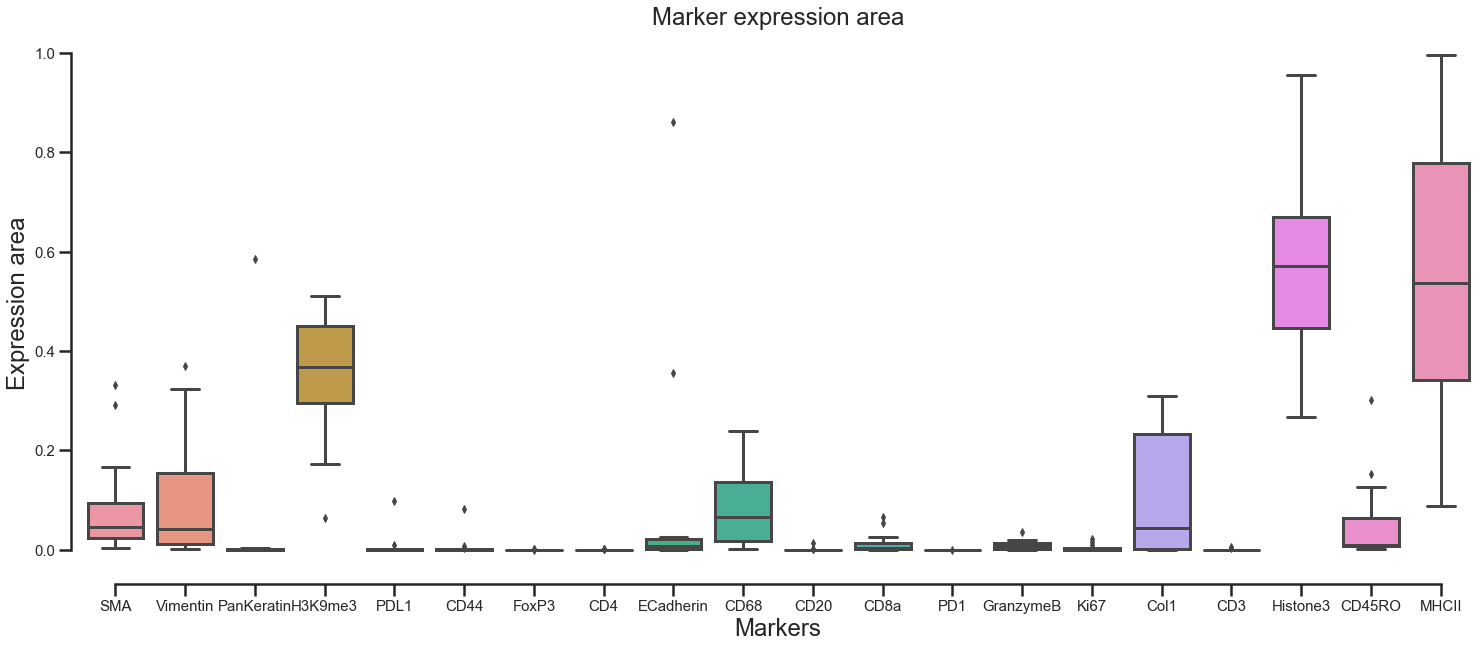

In [38]:
def expression_level_plot(df, path, figsize=(25,10)):
    df_melt = pd.melt(df)
    
    sns.set_style("ticks")
    sns.set_context("poster")
    
    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.boxplot(x='variable',y='value', data=df_melt)
    ax.tick_params(labelsize=15)
    ax.set_title('Marker expression area')
    ax.set_xlabel('Markers')
    ax.set_ylabel('Expression area')
    sns.despine(fig, ax, offset=10, trim=True, bottom=False, left=False);
    fig.savefig(path / 'marker_area_boxplot.png', bbox_inches='tight')
    
expression_level_plot(df_norm, data_figure)

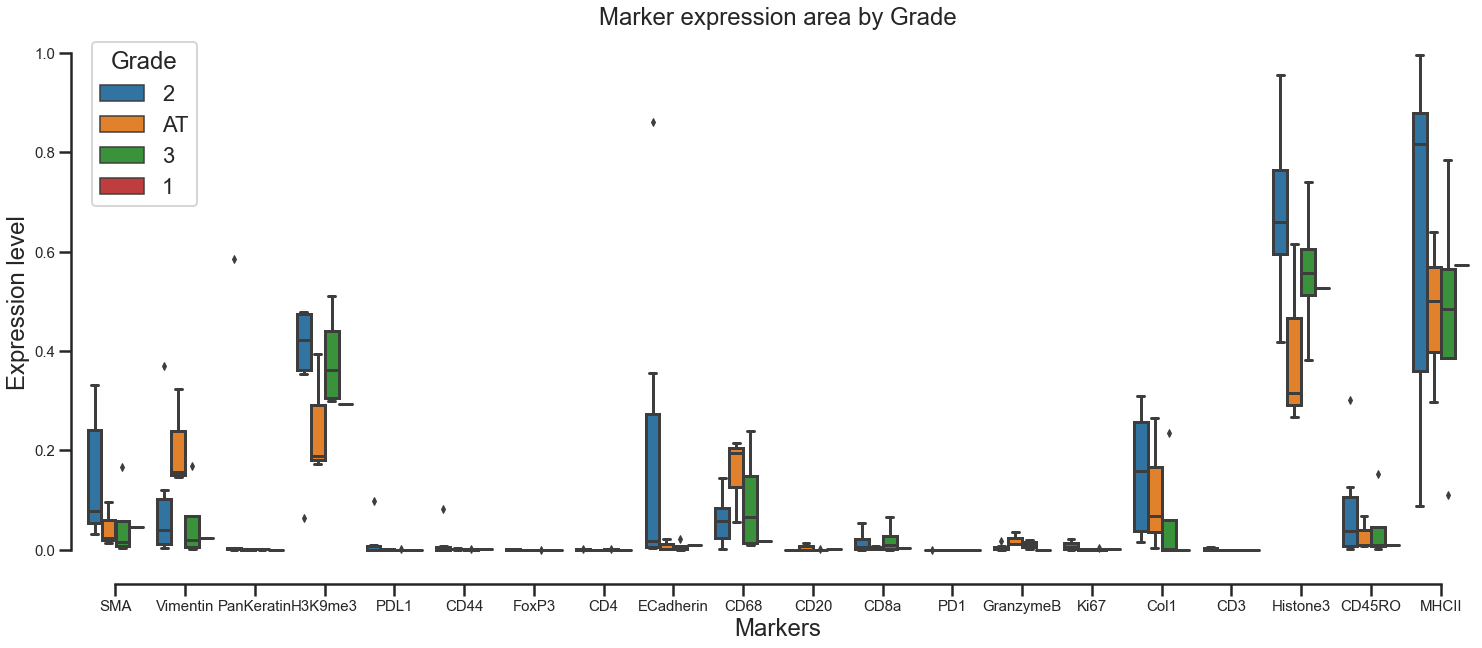

In [41]:
def expression_level_plot2(df, grades, path, name, figsize=(25,10)):
    df_melt = pd.melt(df)
    df_melt[name] = grades
    
    sns.set_style("ticks")
    sns.set_context("poster")
    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.boxplot(x='variable',y='value', hue=name, data=df_melt)
    ax.tick_params(labelsize=15)
    ax.set_title(f'Marker expression area by {name}')
    ax.set_xlabel('Markers')
    ax.set_ylabel('Expression level')
    sns.despine(fig, ax, offset=10, trim=True, bottom=False, left=False);
    fig.savefig(path / f'marker_area_boxplot_{name}.png', bbox_inches='tight')
    
grades = df_metadata.Grades.to_list()
grades = grades * (len(markers)-2)
expression_level_plot2(df_norm, grades, data_figure, 'Grade')

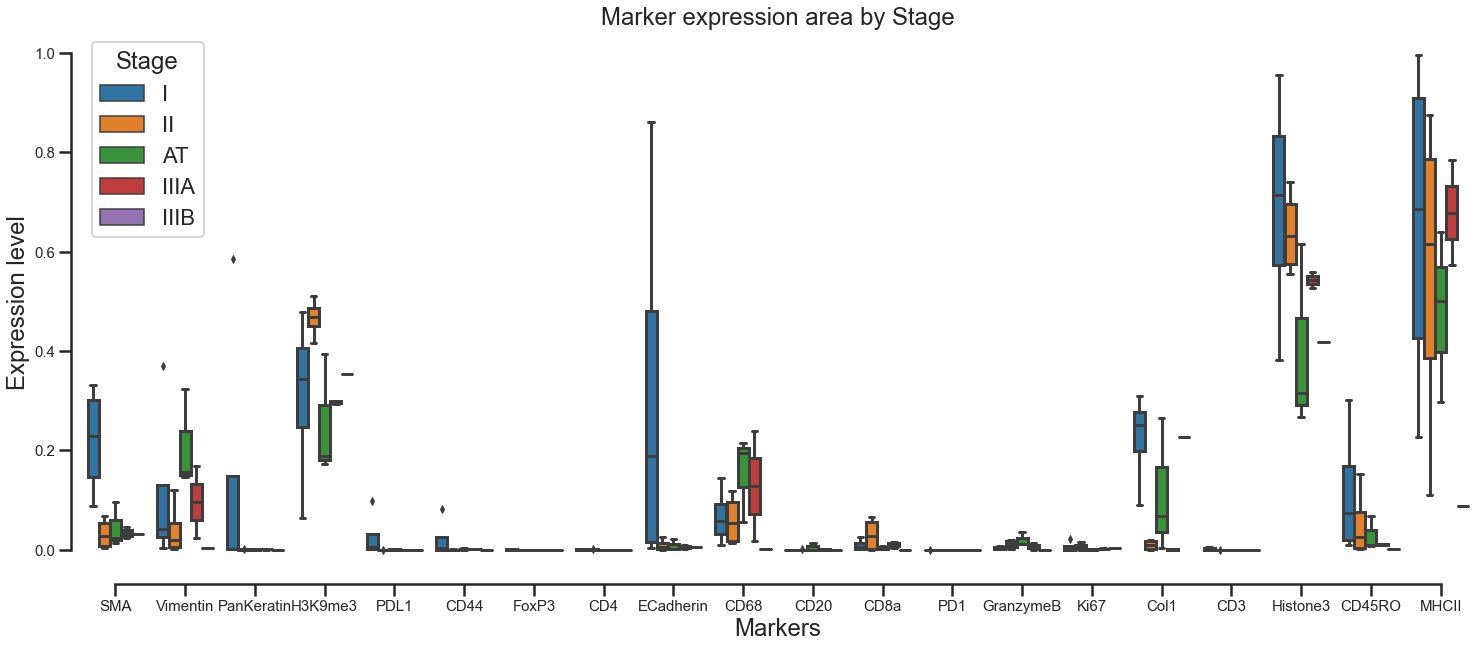

In [42]:
stages = df_metadata.Stage.to_list()
stages = stages * (len(markers)-2)
expression_level_plot2(df_norm, stages, data_figure, 'Stage')